In [2]:
import re

import pandas as pd
from pathlib import Path
from ploting import *

In [10]:
root_path = "horeka"

In [11]:
name_re = re.compile("(weak|strong)_scaling-d_(\d+)-n_(\d+)-([\w_]+)_comm-(gpu|cpu)-nodes_(\d+)")

In [12]:
time_re = re.compile("DURATION:\s*(\d+(\.\d+)?(e[+-]\d+)?)")

In [13]:
data = []
for file in Path(f"{root_path}/data").iterdir():
    if m := name_re.search(file.name):
        with open(file, "r") as input:
            if t_m := time_re.search(input.read()):
                duration = t_m.group(1)
                data.append({"scaling": m.group(1), "dim": m.group(2), "n": m.group(3), "comm_pattern": m.group(4),
                             "type": m.group(5), "nodes": m.group(6), "time": duration})
df = pd.DataFrame(data).drop(columns=["scaling", "type"]).astype({"dim": int, "n": int, "nodes": int, "time": float})
df

,dim,n,comm_pattern,nodes,time
0,3,100,stencil,1,0.113649
1,3,100,stencil,14,0.168402
2,3,100,stencil,2,0.135105
3,3,100,stencil,28,0.236412
4,3,100,stencil,4,0.146671
5,3,100,stencil,56,0.243728
6,3,100,stencil,7,0.152868
7,3,1000,stencil,1,0.122895
8,3,100000,stencil,4,0.462210
9,3,1000,stencil,14,0.182534


In [14]:
piv = df.pivot(index="nodes", columns=["dim", "comm_pattern", "n"], values="time")
piv = piv[piv.columns.sort_values()]
piv

dim                  3                                        
comm_pattern   stencil                                        
n              100       1000      10000     100000    1000000
nodes                                                         
1             0.113649  0.122895  0.152077  0.237025  0.645848
2             0.135105  0.146622  0.173959  0.439350  1.373790
4             0.146671  0.158665  0.880006  0.462210  1.411450
7             0.152868  0.165745  0.204780  0.473269  1.418380
14            0.168402  0.182534  0.208753  0.696000  2.666700
28            0.236412  0.194973  0.850220  0.591123  3.768770
56            0.243728  0.224780  0.908624  0.648293  2.154290

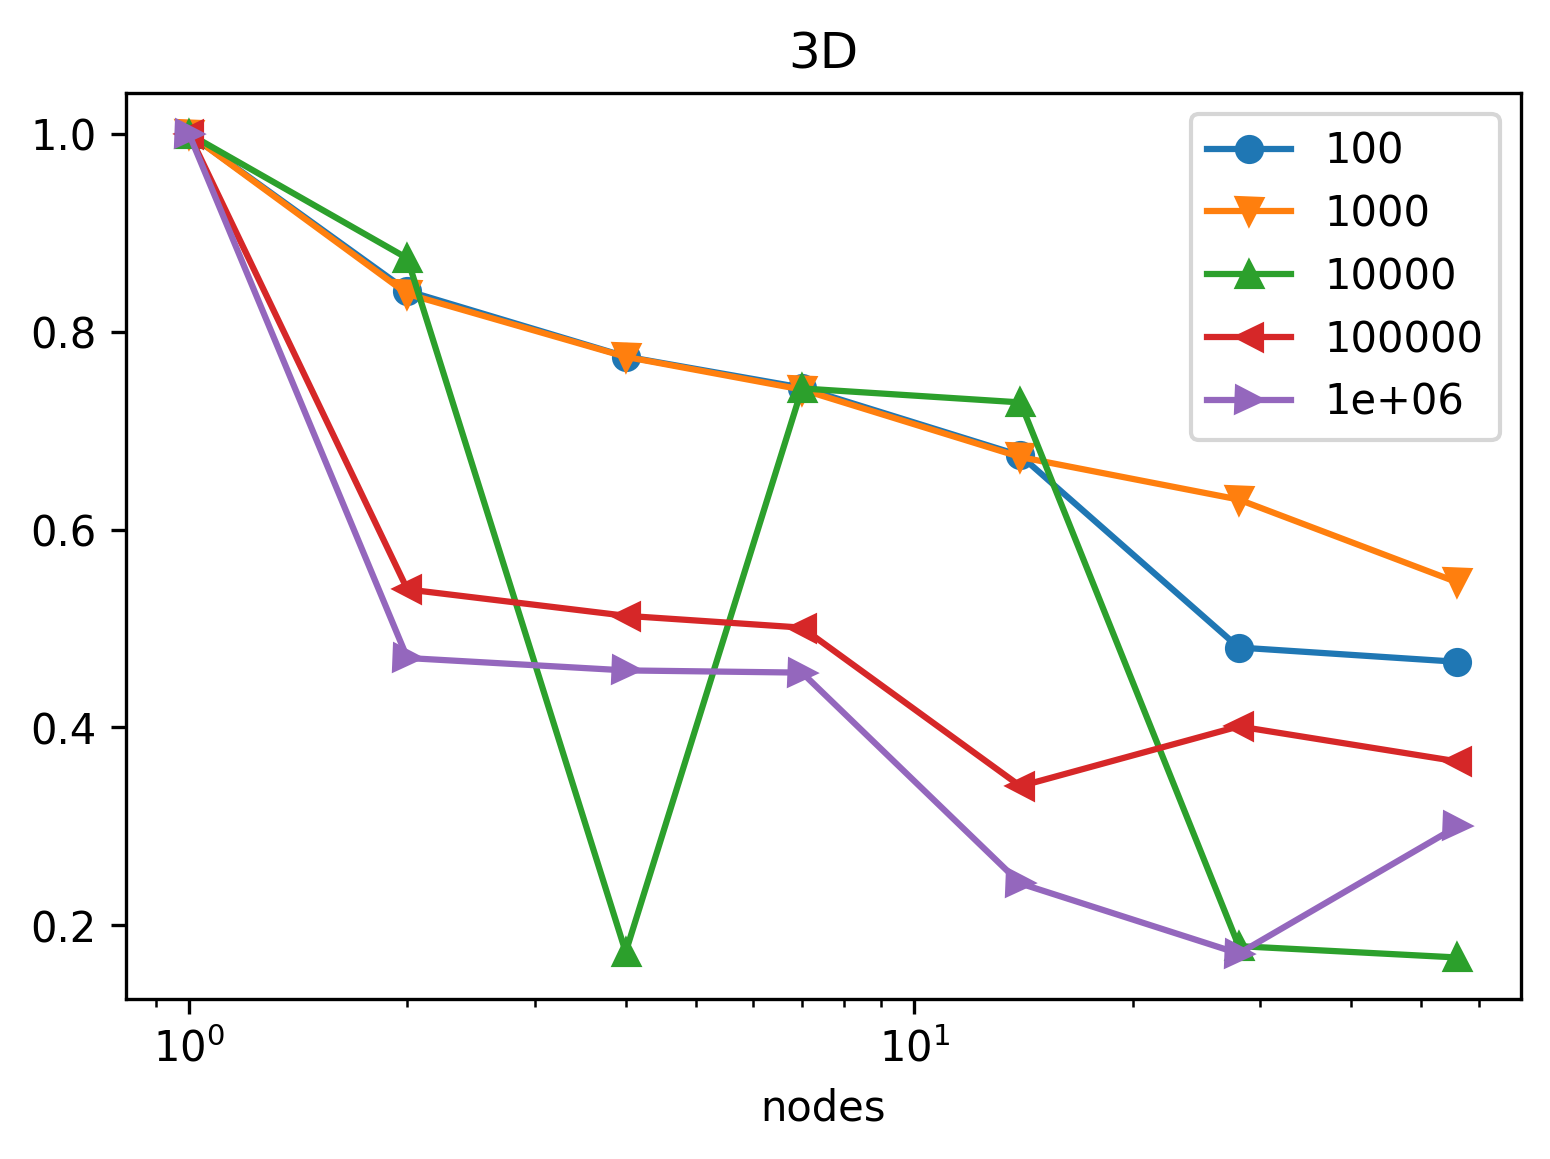

In [15]:
for dim in piv.columns.levels[0]:
    _df = piv[dim]
    fig, ax = plt.subplots(dpi=300)
    for gc in piv.columns.levels[1]:
        ax.set_prop_cycle(default_cycler)
        ax.set_title(f"{dim}D")
        _df[gc].apply(lambda s: s[1] / s).plot(ax=ax, legend=False, logx=True)
        ax.legend([f"{n:g}" for n in piv.columns.levels[2]])
    fig.savefig(f"{root_path}/img/{dim}d.png")